<a href="https://colab.research.google.com/github/krixik-ai/krixik-docs/blob/main/docs/examples/single_module_pipelines/single_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import json
from pathlib import Path

# preparación de demo - incuye instanciación de secretos, instalación de requerimientos, y definición de rutas
if os.getenv("COLAB_RELEASE_TAG"):
    # si estás usando este notebook en Google Colab, ingresa tus secretos acá
    MY_API_KEY = "TU_API_KEY_VA_AQUI"
    MY_API_URL = "TU_API_URL_VA_AQUI"

    # si estás usando este notebook en Google Colab, instala requerimientos y descarga los subdirectorios requeridos
    # instala el cliente Python de Krixik
    !pip install krixik

    # instala github-clone, que permite clonación fácil de los subdirectorios del repositorio de documentación https://github.com/krixik-ai/krixik-docs
    !pip install github-clone

    # clona los conjuntos de datos
    if not Path("data").is_dir():
        !ghclone https://github.com/krixik-ai/krixik-docs/tree/es-main/data
    else:
        print("ya se clonaron los conjuntos de datos de documentación!")

    # define la variable 'data_dir' para tus rutas
    data_dir = "./data/"

    # crea directorio de salidas
    from pathlib import Path

    Path(data_dir + "/salidas").mkdir(parents=True, exist_ok=True)

else:
    # si estás usando una descarga local de la documentación, define las rutas relativas a la estructura local de la documentación
    # importa utilidades
    sys.path.append("../../../")

    # define la variable 'data_dir' para tus rutas
    data_dir = "../../../data/"

    # si estás usando este notebook localmente desde el repositorio de documentación Krixik, carga tus secretos de un archivo .env ubicado en la base del repositorio de documentación
    from dotenv import load_dotenv

    load_dotenv("../../../.env")

    MY_API_KEY = os.getenv("MY_API_KEY")
    MY_API_URL = os.getenv("MY_API_URL")


# importa Krixik e inicializa sesión con tus secretos personales
from krixik import krixik

krixik.init(api_key=MY_API_KEY, api_url=MY_API_URL)

SUCCESS: You are now authenticated.


## *Pipeline* de Módulo Único: `ocr` (ROC - Reconocimiento Óptico de Caracteres)
[🇺🇸 English version of this document](https://krixik-docs.readthedocs.io/latest/examples/single_module_pipelines/single_ocr/)

Este documento presenta una guía de cómo ensamblar y consumir un *pipeline* de módulo único que solo incluye un módulo [`ocr` (ROC - Reconocimiento Óptico de Caracteres)](../../modulos/modulos_ia/modulo_ocr_roc.md). Se divide en las siguientes secciones:

- [Monta tu *Pipeline*](#monta-tu-pipeline)
- [Formato de Entrada Requerido](#formato-de-entrada-requerido)
- [Cómo Usar el Modelo Predeterminado](#como-usar-el-modelo-predeterminado)
- [Cómo Usar un Modelo No-Predeterminado](#como-usar-un-modelo-no-predeterminado)

### Monta tu *Pipeline*

Primero crea un *pipeline* de módulo único con un módulo [`ocr` (ROC - Reconocimiento Óptico de Caracteres)](../../modulos/modulos_ia/modulo_ocr_roc.md).

Usa el método [`create_pipeline`](../../sistema/creacion_de_pipelines/creacion_de_pipelines.md) para esto, incluyendo solamente una referencia de módulo [`ocr`](../../modulos/modulos_ia/modulo_ocr_roc.md) en el argumento `module_chain`.

In [2]:
# crea un pipeline con un solo módulo ocr
pipeline = krixik.create_pipeline(name="unico_ocr_1", module_chain=["ocr"])

### Formato de Entrada Requerido

El módulo [`ocr` (ROC - Reconocimiento Óptico de Caracteres)](../../modulos/modulos_ia/modulo_ocr_roc.md) recibe como [entradas](../../modulos/modulos_ia/modulo_ocr_roc.md#entradas-y-salidas-del-modulo-ocr) archivos de imagen con formato PNG, JPG y JPEG.

Antes de procesar un archivo de entrada—uno válido para este *pipeline*—examínalo con el siguiente código:

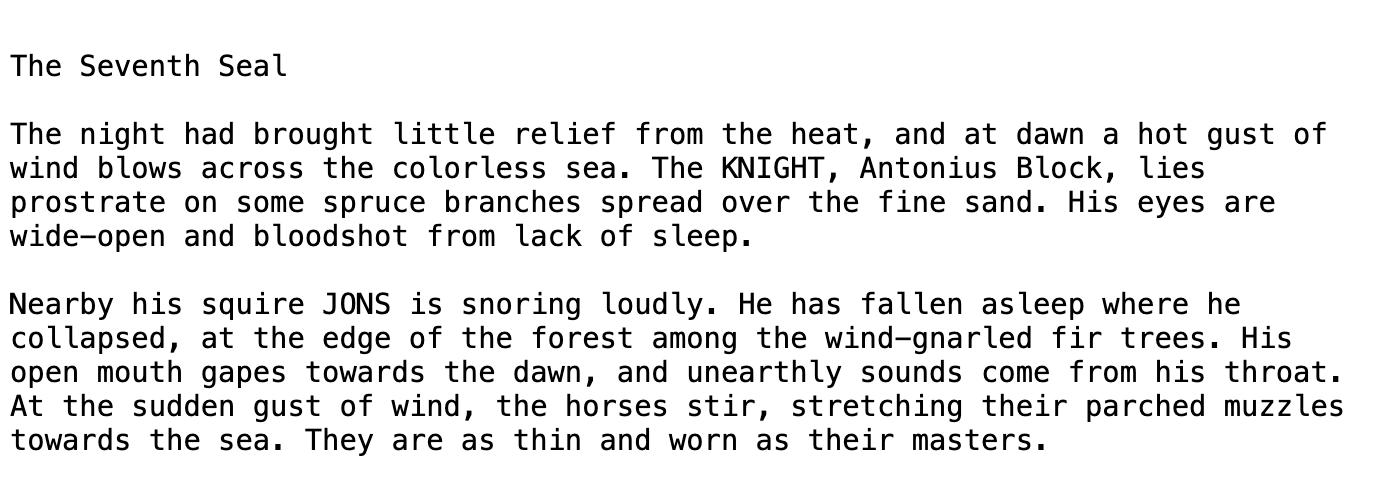

In [3]:
# examina el contenido de un archivo de entrada válido
from IPython.display import Image

Image(filename=data_dir + "input/sello.png")

### Como Usar el Modelo Predeterminado

Ahora procesa el archivo usando el modelo [predeterminado](../../modulos/modulos_ia/modulo_ocr_roc.md#modelos-disponibles-en-el-modulo-ocr) del módulo [`ocr` (leyenda de imagen)](../../modulos/modulos_ia/modulo_ocr_roc.md): [`tesseract-en`](https://github.com/tesseract-ocr/tesseract).

Dado que este es el modelo predeterminado, no hace falta que especifiques qué modelo quieres usar a través del argumento opcional [`modules`](../../sistema/parametros_y_procesar_archivos_a_traves_de_pipelines/metodo_process_procesar.md#seleccion-de-modelo-por-medio-del-argumento-modules) del método [`process`](../../sistema/parametros_y_procesar_archivos_a_traves_de_pipelines/metodo_process_procesar.md).

In [4]:
# no mostrar actualizaciones de proceso al ejecutar el código
process_output = pipeline.process(
    local_file_path=data_dir + "input/sello.png",  # la ruta de archivo inicial en la que yace el archivo de entrada
    local_save_directory=data_dir + "output",  # el directorio local en el que se guardará el archivo de salida
    expire_time=60 * 30,  # process data will be deleted from the Krixik system in 30 minutes
    wait_for_process=True,  # wait for process to complete before returning IDE control to user
    verbose=False,
)  # do not display process update printouts upon running code

La salida del proceso se reproduce con el siguiente código. Para aprender más sobre cada componente de esta salida, revisa la documentación del método [`process`](../../sistema/parametros_y_procesar_archivos_a_traves_de_pipelines/metodo_process_procesar.md).

Dado que la salida de este modelo/módulo es un archivo JSON, la salida también se incluye en el objeto (esto solo ese el caso para salidas JSON). Además, el archivo de salida se ha guardado en la ubicación indicada bajo `process_output_files`. El `file_id` del archivo procesado es el prefijo del nombre del archivo de salida en esta ubicación.

In [5]:
# nítidamente reproduce la salida de este proceso
print(json.dumps(process_output, indent=2))

{
  "status_code": 200,
  "pipeline": "single_ocr_1",
  "request_id": "dbdc2a06-bdf4-42d4-982c-56ad350479b5",
  "file_id": "10108ae4-8bcf-4b5f-b109-4e4eff94f343",
  "message": "SUCCESS - output fetched for file_id 10108ae4-8bcf-4b5f-b109-4e4eff94f343.Output saved to location(s) listed in process_output_files.",
  "warnings": [],
  "process_output": [
    {
      "text": "The Seventh Seal\n\nThe night had brought little relief from the heat, and at dawn a hot gust of\nwind blows across the colorless sea. The KNIGHT, Antonius Block, lies\nprostrate on some spruce branches spread over the fine sand. His eyes are\nwide-open and bloodshot from lack of sleep.\n\nNearby his squire JONS is snoring loudly. He has fallen asleep where he\ncollapsed, at the edge of the forest among the wind-gnarled fir trees. His\nopen mouth gapes towards the dawn, and unearthly sounds come from his throat.\nAt the sudden gust of wind, the horses stir, stretching their parched muzzles\ntowards the sea. They are as

Para confirmar que todo salió como esperabas, carga el archivo de `process_output_files`:

In [6]:
# carga la salida del proceso del archivo
with open(process_output["process_output_files"][0]) as f:
    print(json.dumps(json.load(f), indent=2))

[
  {
    "text": "The Seventh Seal\n\nThe night had brought little relief from the heat, and at dawn a hot gust of\nwind blows across the colorless sea. The KNIGHT, Antonius Block, lies\nprostrate on some spruce branches spread over the fine sand. His eyes are\nwide-open and bloodshot from lack of sleep.\n\nNearby his squire JONS is snoring loudly. He has fallen asleep where he\ncollapsed, at the edge of the forest among the wind-gnarled fir trees. His\nopen mouth gapes towards the dawn, and unearthly sounds come from his throat.\nAt the sudden gust of wind, the horses stir, stretching their parched muzzles\ntowards the sea. They are as thin and worn as their masters.\n",
    "detections": [
      {
        "left": 10,
        "top": 54,
        "width": 51,
        "height": 22,
        "text": "The",
        "conf": 90.48
      },
      {
        "left": 81,
        "top": 54,
        "width": 117,
        "height": 22,
        "text": "Seventh",
        "conf": 90.48
      },
     

### Como Usar un Modelo No-Predeterminado

Para usar un modelo [no-predeterminado](../../modulos/modulos_ia/modulo_ocr_roc.md#modelos-disponibles-en-el-modulo-ocr) como [`tesseract-es`](https://github.com/tesseract-ocr/tesseract) (cuyo enfoque es extraer texto en español), debes especificarlo a través del argumento [`modules`](../../sistema/parametros_y_procesar_archivos_a_traves_de_pipelines/metodo_process_procesar.md#seleccion-de-modelo-por-medio-del-argumento-modules) al usar el método [`process`](../../sistema/parametros_y_procesar_archivos_a_traves_de_pipelines/metodo_process_procesar.md):

In [7]:
# procesa el archivo con un modelo no-predeterminado
process_output = pipeline.process(
    local_file_path=data_dir + "input/sello.png",  # todos los argumentos (salvo modules) son iguales que antes
    local_save_directory=data_dir + "output",
    expire_time=60 * 30,
    wait_for_process=True,
    verbose=False,
    modules={"ocr": {"model": "tesseract-es"}},  # especifica un modelo no-predeterminado para este proceso
)

La salida del proceso se reproduce con el siguiente código. Aunque la imagen de entrada tiene texto en inglés en vez de español (el idioma del modelo), todos los caracteres del idioma inglés están en el español. Más aún, el modelo extrae texto sin tratar de interpretarlo. Funcionará bien. En cambio, un modelo ROC para el idioma inglés tal vez no funcionaría tan bien para una imagen con texto en español.

Dado que la salida de este modelo/módulo es un archivo JSON, la salida también se incluye en el objeto (esto solo ese el caso para salidas JSON). Además, el archivo de salida se ha guardado en la ubicación indicada bajo `process_output_files`. El `file_id` del archivo procesado es el prefijo del nombre del archivo de salida en esta ubicación.

In [8]:
# nítidamente reproduce la salida de este proceso
print(json.dumps(process_output, indent=2))

{
  "status_code": 200,
  "pipeline": "single_ocr_1",
  "request_id": "fec47c22-5f6d-4d69-9c5b-167762d29a71",
  "file_id": "649882ac-0e8a-4fdb-85fb-21afe388b453",
  "message": "SUCCESS - output fetched for file_id 649882ac-0e8a-4fdb-85fb-21afe388b453.Output saved to location(s) listed in process_output_files.",
  "warnings": [],
  "process_output": [
    {
      "text": "The Seventh Seal\n\nThe night had brought little relief from the heat, and at dawn a hot gust of\nwind blows across the colorless sea. The KNIGHT, Antonius Block, lies\nprostrate on some spruce branches spread over the fine sand. His eyes are\nwide-open and bloodshot from lack of sleep.\n\nNearby his squire JONS is snoring loudly. He has fallen asleep where he\ncollapsed, at the edge of the forest among the wind-gnarled fir trees. His\nopen mouth gapes towards the dawn, and unearthly sounds come from his throat.\nAt the sudden gust of wind, the horses stir, stretching their parched muzzles\ntowards the sea. They are as

In [9]:
# elimina todos los datos procesados pertenecientes a este pipeline
krixik.reset_pipeline(pipeline)